# Kaggle: Housing Prices 

In this notebook we explore the [housing prices kaggle challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) with Google Colab.  


This is the second notebook in the housing prices kaggle challenge.  Here we explore ML techniques for performing the regression.



To begin, we will clone the repo to have access to the kaggle dataset.

In [1]:
!git clone https://github.com/demarley/figment

fatal: destination path 'figment' already exists and is not an empty directory.


## ML Techniques

Let's explore some ML techniques for doing the regression.

I've only used a few of these techniques (briefly) in my own physics analyses.  As such, I will take some time to work with the scikit-learn API to get a better understanding of what's going on.

_When we did use these techniques, it was only to prove that we could easily outperform our 'basic' analysis techniques. However, once we started testing Boosted Decision Trees and Neural Networks, we never looked back._

In [0]:
# plotting
import matplotlib.style
import matplotlib as mpl
mpl.style.use("default")
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# doing stuff
import numpy as np
import sklearn
import pandas as pd

In [0]:
df = pd.read_csv("drive/My Drive/ColabNotebooks/kaggle_housing_prices/train.csv"); # specific to my setup

### Data Cleaning 

From the previous notebook, we know there are changes we can make to the dataset.  Let's do that again here.

In [2]:
str_data = {}
for i in df.columns:
    if isinstance(df[i][0],str):
        str_data[i] = list(set(df[i]))

NameError: ignored

For each of these values, we will assign a number 0-N for the N unique values in the dataframe.
All of the `nan` values will receive a value of `-1`.

In [0]:
# First get all of the unique column names (except 'NaN')
values = []
cols   = list(str_data.keys())

for k in cols:
    for sd in str_data[k]:
        try:
            np.isnan(sd)
        except TypeError:
            if sd not in values: values.append(sd)

# Next, let's assign an integer to each name
allvalues = {}
for v,val in enumerate(values):
    allvalues[val] = v

Now that we have unique integer values for each text value, let's update the dictionary

In [0]:
df = df.fillna(-1)  # fill NaNs with '-1'

In [0]:
for k in cols:
    for val in str_data[k]:
        try:
            np.isnan(val)
        except TypeError:
            df.loc[df[k] == val, k] = allvalues[val]

In [0]:
# Check that some of these worked
data = df['BsmtQual'].values
h,b = np.histogram(data)
bin_centers = 0.5*(b[:-1]+b[1:])
print(bin_centers)

[  4.55  15.65  26.75  37.85  48.95  60.05  71.15  82.25  93.35 104.45]


(array([121., 618.,  35., 649.]),
 array([107.  , 107.75, 108.5 , 109.25, 110.  ]),
 <a list of 4 Patch objects>)

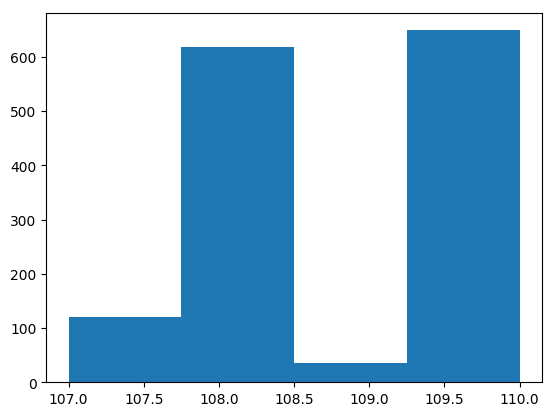

In [0]:
plt.hist(data[np.where(data>0)],bins=4)

## Deep Learning

In the next notebook, we will explore `keras+tensorflow` and some `pytorch` to perform the regression.